## Data Analysis 3: Prediction and Introduction to Machine Learning - Assignment 1

In this study, our business question is what are the determinants of the hourly wages of workers. We are going to use a cross sectional data to answer this question. Our data source is the book "Data Analysis for Business, Economics, and Policy". This data is earnings data collected by U.S. Bureau of Labor Statistics. The dataset has various columns including weekly working hours and ernings. In the next chapters of this notebook, we will go through Sample Design, Explaratory Data Analysis, Feature Engineering and finally applying different Regression Models.

### Sample Design

In this part, we get the data to be used for our analysis, apply necessary filters and prepare data for Exploratory Data Analysis.

In [1]:
# Import necessary libraries/packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse

# Import the prewritten helper functions
from py_helper_functions import *

##### Get Data

In [2]:
# Access the data directly from the book's website
data_earnings = pd.read_csv("https://osf.io/4ay9x/download")

In [3]:
data_earnings.shape

(149316, 23)

In [4]:
#Check columns
data_earnings.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

In [5]:
#filter the data for selected job codes
selected_job_codes = [500,510,520,530,540,565,600,630,640,650,700,710,725,726,735,740,
                      800, 810, 820, 830, 840, 850, 860, 900, 910, 930, 940, 950]

# Business and Financial Operations Occupations
buss_fin_occ_data = data_earnings[data_earnings['occ2012'].isin(selected_job_codes)]

In [6]:
# There are 7326 observations under "Business and Financial Operations Occupations" title
buss_fin_occ_data.shape

(7326, 23)

In [7]:
buss_fin_occ_data.head()
# With a quick look, we see there are NaN values in the data. We need to handle these in next steps

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.0,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
22,44,954001919079770,January,AL,3677.7816,680.0,40,43,1,NaN,...,0,0,"Native, Born In US",63,Non-depository credit and related activities (...,800,"Private, For Profit",No,No,Employed-At Work
53,125,507001320102921,January,AL,3296.7986,2000.0,50,44,1,NaN,...,1,1,"Native, Born In US",63,Real estate (531),800,"Private, For Profit",No,No,Employed-At Work
56,131,510915094903939,January,AL,3419.5125,1923.0,40,43,1,NaN,...,2,10,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",910,"Private, For Profit",No,No,Employed-At Work
80,187,210033043908195,January,AL,4563.6243,280.0,32,42,1,NaN,...,0,0,"Native, Born In US",63,"Recreational vehicle parks and camps, and room...",800,"Private, For Profit",No,No,Employed-At Work


In [8]:
buss_fin_occ_data.info()

# There are float64(3), int64(11) and object(9) type columns in the data

<class 'pandas.core.frame.DataFrame'>
Index: 7326 entries, 0 to 149296
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7326 non-null   int64  
 1   hhid        7326 non-null   int64  
 2   intmonth    7326 non-null   object 
 3   stfips      7326 non-null   object 
 4   weight      7326 non-null   float64
 5   earnwke     7326 non-null   float64
 6   uhours      7326 non-null   int64  
 7   grade92     7326 non-null   int64  
 8   race        7326 non-null   int64  
 9   ethnic      509 non-null    float64
 10  age         7326 non-null   int64  
 11  sex         7326 non-null   int64  
 12  marital     7326 non-null   int64  
 13  ownchild    7326 non-null   int64  
 14  chldpres    7326 non-null   int64  
 15  prcitshp    7326 non-null   object 
 16  state       7326 non-null   object 
 17  ind02       7326 non-null   object 
 18  occ2012     7326 non-null   int64  
 19  class       7326 non-null   ob

### Exploratory Data Analysis (EDA)

In this part we deal with missing values, check extreme values. First of all, we would like to know what does each column represent. In other words, we will shortly introduce the data in each column (i.e. variable labels).

* `Unnamed`: An already existing index column in raw data. We will drop it in the next step.
* `hhid`: Household ID
* `intmonth`: Interview calendar month
* `stfips`: State FIPS codes
* `weight`: This is the Final Weight. The sum of the Final Weights in each monthly survey is the US non-institutional population.
* `earnwke`: Weakly earnings
* `uhours`: Usual work hours per week
* `grade92`: Highest grade attended
* `race`: Race
* `ethnic`: Ethnicity
* `age`: Age
* `sex`: Gender
* `marital`: Marital status
* `ownchild`: Number of own children less than 18 in primary family
* `chldpres`: Presence of own children less than 18 in primary family
* `prcitshp`: Citizenship status
* `state`: State
* `ind02`: 3-digit NAICS-based industry code 
* `occ2012`: Occupational code (census 2010 classification)
* `class`: Class of worker
* `unionmme`: Union member
* `unioncov`: Covered by a union contract
* `lfsr94`: Employment status recode


In [9]:
# Check missing variables
to_filter = buss_fin_occ_data.isna().sum()
to_filter[to_filter>0].index
# We have missing values in two columns

Index(['ethnic', 'unioncov'], dtype='object')

In [10]:
to_filter

Unnamed: 0       0
hhid             0
intmonth         0
stfips           0
weight           0
earnwke          0
uhours           0
grade92          0
race             0
ethnic        6817
age              0
sex              0
marital          0
ownchild         0
chldpres         0
prcitshp         0
state            0
ind02            0
occ2012          0
class            0
unionmme         0
unioncov       386
lfsr94           0
dtype: int64

Since we have 7,326 entries in selected job title and 6,817 missing values in `ethnic` column (approximately 93% missing values), it would be wise to drop this column.

##### Columns: Unnamed,  hhid, intmonth, ethnic

In [11]:
# Drop 'ethnic' column due to high rate of missing values
buss_fin_occ_data = buss_fin_occ_data.drop(["ethnic"],axis=1)

# Drop 'unnamed' column (it was an index column in original data)
buss_fin_occ_data = buss_fin_occ_data.drop(["Unnamed: 0"],axis=1)

# Drop 'hhid' column (id column will not help us in the analysis)
buss_fin_occ_data = buss_fin_occ_data.drop(["hhid"],axis=1)

# Drop 'intmonth' column (interview month does not make sense to use since data is not time series but cross-sectional)
buss_fin_occ_data = buss_fin_occ_data.drop(["intmonth"],axis=1)

##### Columns: stfips, state

In [12]:
# Values in 'state' column are irregularly labeled. Insted of this column we may use 'stfips', which has state codes.
buss_fin_occ_data.state.unique()

array(['63', '94', '86', '71', '93', '84', 'CT', '51', '53', '59', '58',
       '95', '82', 'IL', 'IN', 'IA', '47', '61', '72', 'ME', '52', 'MA',
       'MI', 'MN', '64', 'MO', '81', '46', '88', 'NH', 'NJ', '85', 'NY',
       '56', 'ND', 'OH', '73', '92', 'PA', 'RI', '57', 'SD', '62', '74',
       '87', 'VT', '54', '91', 'WI', '83', '55', '6', '9', '8', '7', '1',
       '5', '3', '4', '2', 4, 6, 7, 1, 5, 3, 8, 2, 9], dtype=object)

In [13]:
# Drop 'state' column due to irregularity mentioned above
buss_fin_occ_data = buss_fin_occ_data.drop(["state"],axis=1)

##### Columns: weight

In [14]:
# Drop 'weight' column (it is thuoughy to be unrelated for estimating hourly wages)
buss_fin_occ_data = buss_fin_occ_data.drop(["weight"],axis=1)

##### Columns: earnwke, uhours

In [15]:
# Now create 'earnings per hour' variable
buss_fin_occ_data["earnings_per_hour"] = buss_fin_occ_data["earnwke"] / buss_fin_occ_data["uhours"]

In [16]:
# Now check summary statistics of the 'earnings per hour' variable
buss_fin_occ_data["earnings_per_hour"].describe()

count    7326.000000
mean       29.535976
std        17.345381
min         0.000500
25%        18.269000
50%        25.640889
75%        37.019000
max       500.000000
Name: earnings_per_hour, dtype: float64

Although mean and median values are around 25-30 USD, there seem to be extreme values on both sides (the min and max values are extreme). We will keep them since we don't know whether they are wrong measurement/observations.

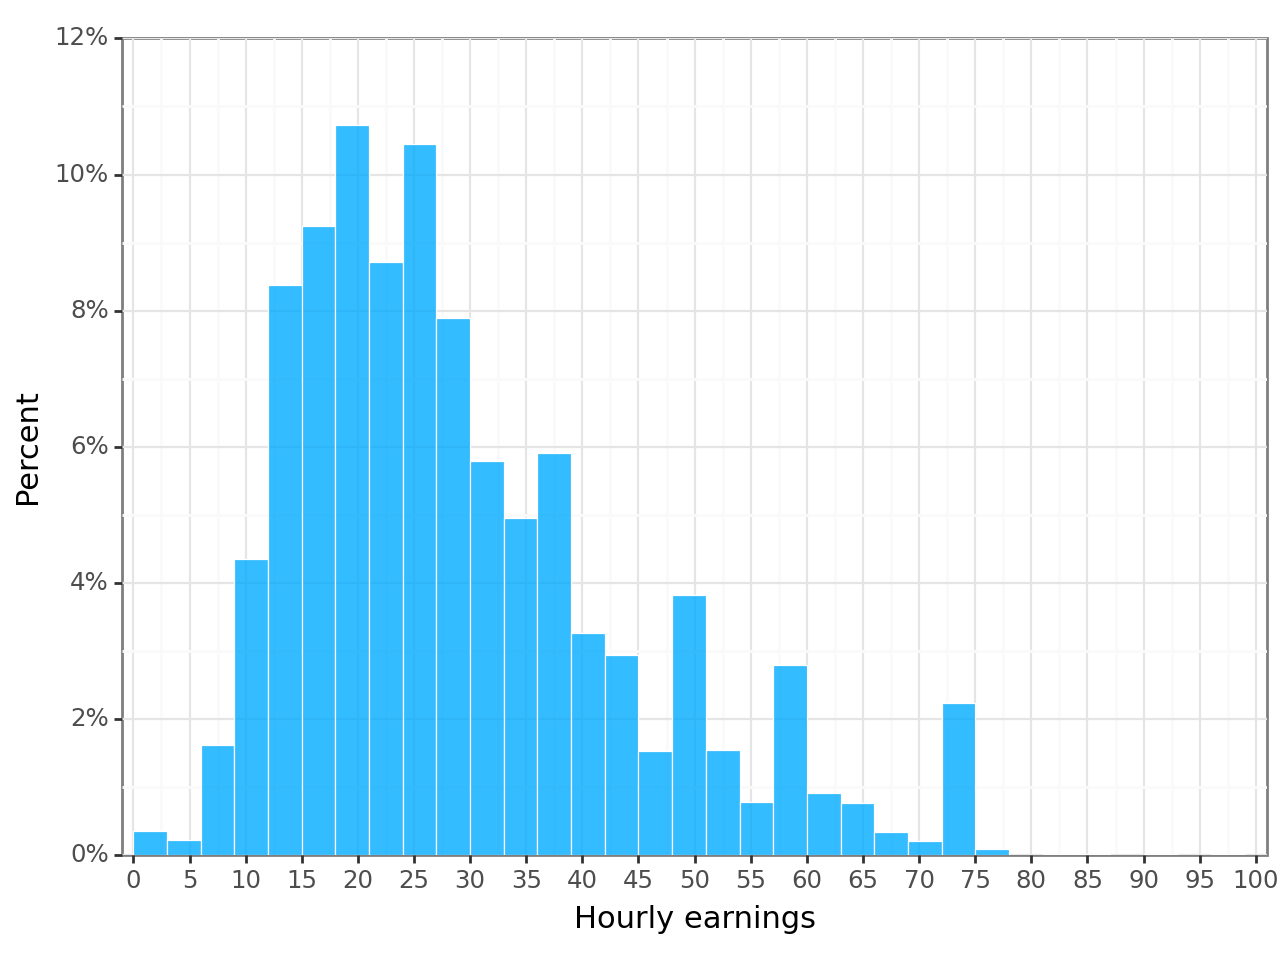

<Figure Size: (640 x 480)>

In [17]:
# Now visually check distribution of hourly earnings
(
    ggplot(buss_fin_occ_data, aes(x="earnings_per_hour", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill= "#00abff",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 100), breaks=seq(0, 100, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.02),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

Hourly earnings are a little bit left-skewed. We can also check $ln(hourlywages)$. 

In [18]:
# First create ln of 'earnings per hour' variable
buss_fin_occ_data["ln_earnings_per_hour"] = np.log(buss_fin_occ_data["earnings_per_hour"])

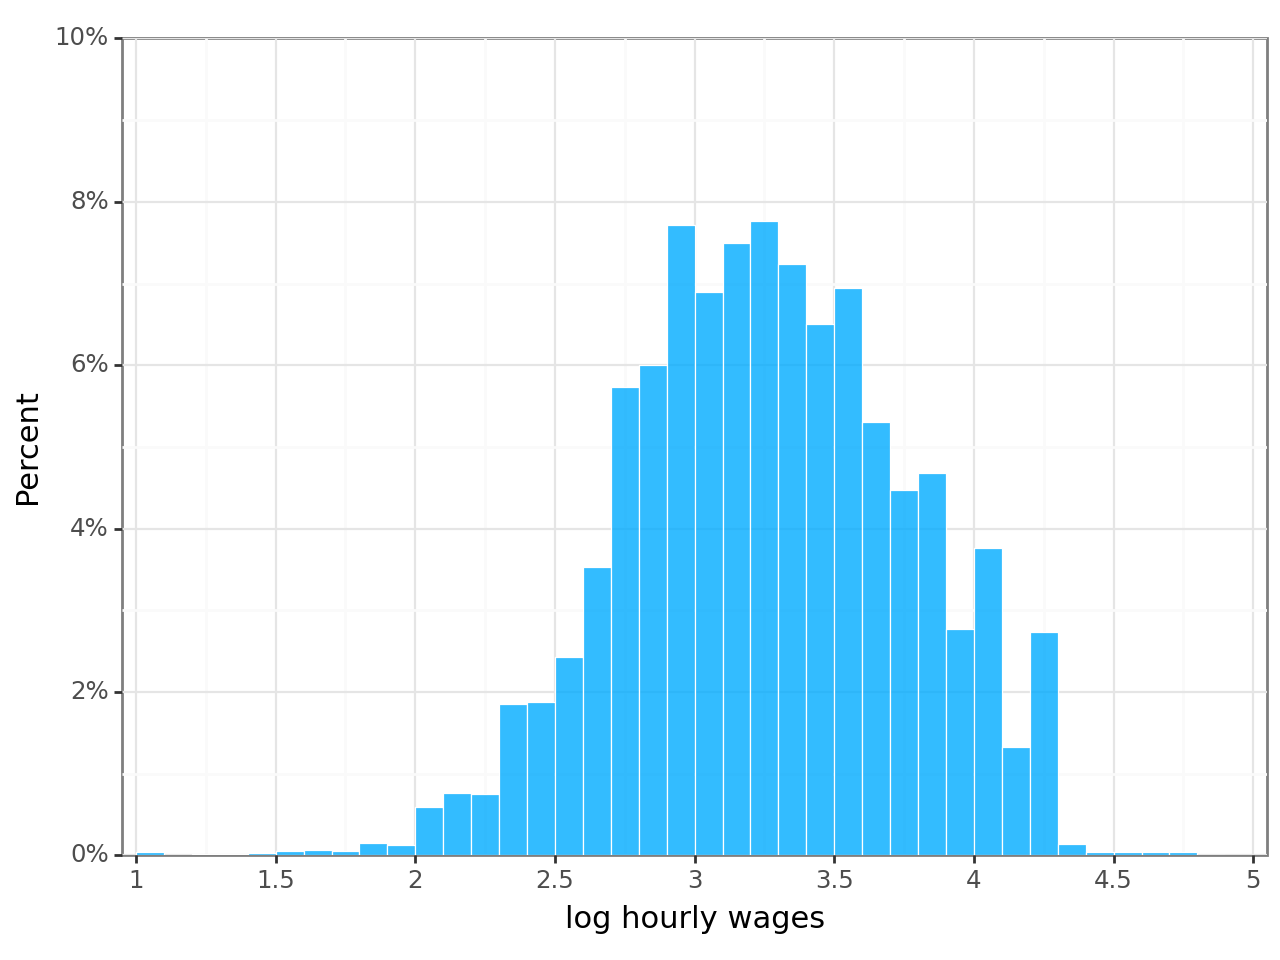

<Figure Size: (640 x 480)>

In [19]:
# Now visualize the distribution of ln of hourly earnings
(
    ggplot(buss_fin_occ_data, aes(x="ln_earnings_per_hour", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.1,
        boundary=0,
        color="white",
        fill="#00abff",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="log hourly wages", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 0.5))
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.1),
        breaks=seq(0, 0.1, 0.02),
        labels=percent_format(), #mizani
    )
    + theme_bw()
)

Although not perfect, log of hourly wages are more close to normal distribution than the level wages.

##### Columns: grade92

In [20]:
# check frequencies by 'grade92'
freq = buss_fin_occ_data.groupby("grade92").agg(frequency=("grade92", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
grade92,,,
31,1,0.014,0.014
32,4,0.055,0.069
33,1,0.014,0.083
34,3,0.041,0.124
35,3,0.041,0.165
36,9,0.123,0.288
37,15,0.205,0.493
38,19,0.259,0.752
39,751,10.251,11.003


Since the majority of the data has education labels between "39-High school graduate" and "44-Master's degree", we will exclude the remaining rows and keep rows that has values in range 39-44.

In [21]:
# Filter the data based on 'grade92' column
buss_fin_occ_data = buss_fin_occ_data.query("grade92>=39 & grade92<=44")

In [22]:
buss_fin_occ_data.shape

(7128, 19)

We only removed 198 observations by education level filter (7,326 - 7,128 = 198).

##### Columns: race

In [23]:
# check frequencies by 'race'
freq = buss_fin_occ_data.groupby("race").agg(frequency=("race", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
race,,,
1,5902,82.800,82.800
2,578,8.109,90.909
3,40,0.561,91.470
4,486,6.818,98.288
5,19,0.267,98.555
6,26,0.365,98.920
7,27,0.379,99.299
8,25,0.351,99.650
9,4,0.056,99.706


Since the majority of variable `race` is falls under lable 'White', we will not use this variable in our analysis.

In [24]:
# Drop 'race' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["race"],axis=1)

##### Columns: sex

In [25]:
# check frequencies by 'sex'
freq = buss_fin_occ_data.groupby("sex").agg(frequency=("sex", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
sex,,,
1,2894,40.6,40.6
2,4234,59.4,100.0


`1` represents `male` and `2` represents `female`. It is interesting to that see number of female workers is higher than male workers.

##### Columns: age

In [26]:
buss_fin_occ_data.age.describe()

count    7128.000000
mean       41.734708
std        11.760014
min        18.000000
25%        32.000000
50%        42.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Summary of age column shows that the ages of the employees in the dataset are between 16 and 64. There is no need to take any action for this variable for now.

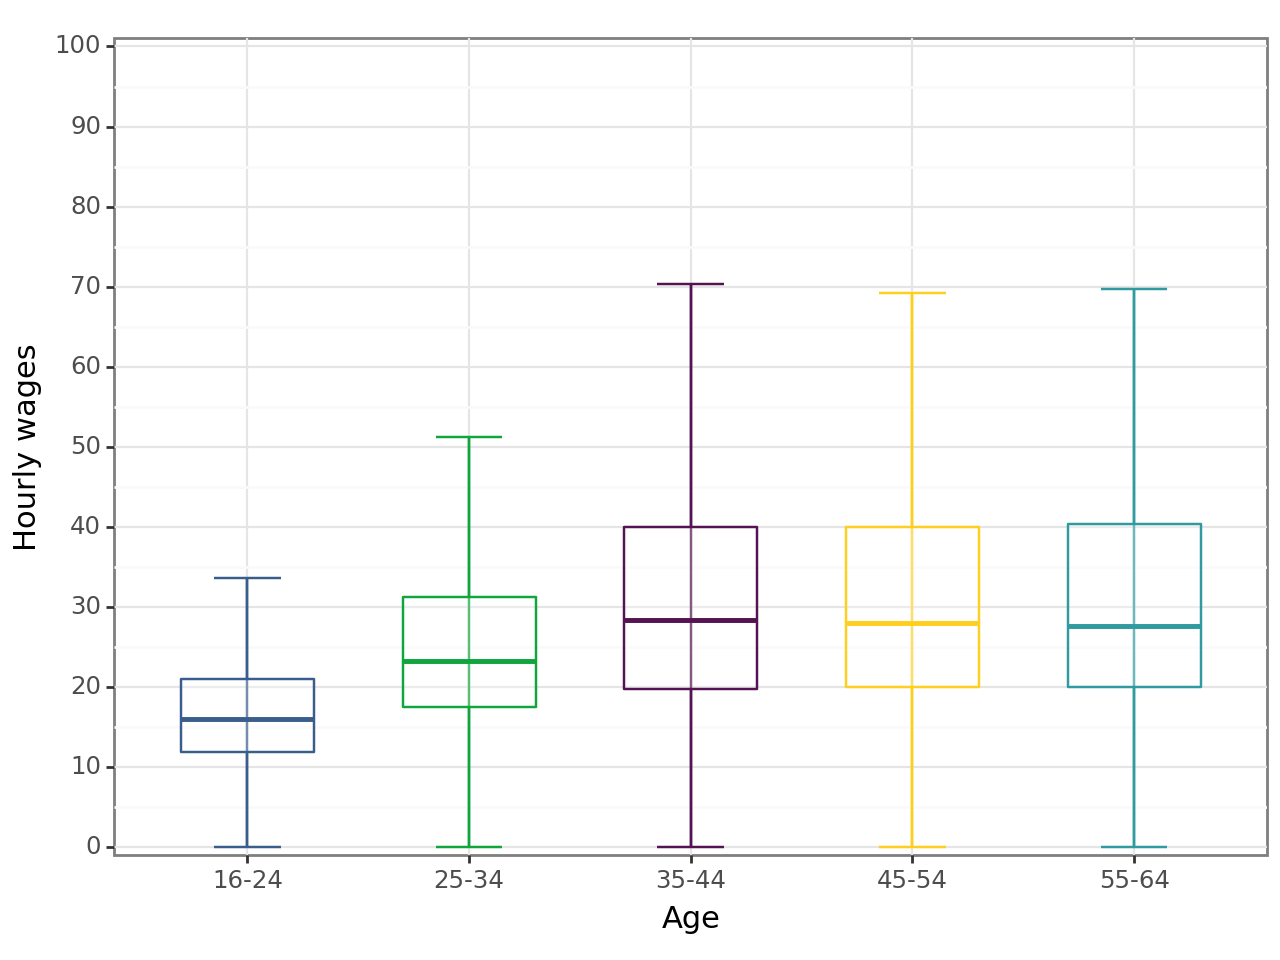

<Figure Size: (640 x 480)>

In [27]:
# Define age groups
age_ranges = [(16, 24), (25, 34), (35, 44), (45, 54), (55, 64)]

# Categorize individuals into age ranges
buss_fin_occ_data2 = buss_fin_occ_data.iloc[:,:]
buss_fin_occ_data2['age_range'] = pd.cut(buss_fin_occ_data2['age'], bins=[start - 1 for start, end in age_ranges] + 
                                        [age_ranges[-1][1]], labels=[f"{start}-{end}" for start, end in age_ranges])


## Boxplot of price by age groups
(
    ggplot(buss_fin_occ_data2, aes(x="age_range", y="earnings_per_hour"))
    + stat_boxplot(
        aes(group="age_range"),
        geom="errorbar",
        width=0.3,
        color=color,
        size=0.5,
        na_rm=True,
    )
    + geom_boxplot(
        aes(group="age_range"),
        color=color,
        size=0.5,
        width=0.6,
        alpha=0.3,
        na_rm=True,
        outlier_shape="",
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=(0, 100), breaks=seq(0, 100, 10))
    + labs(x="Age", y="Hourly wages")
    + theme_bw()
)

There is an upward trend in hourly wages until 35-44 age group, but after this range, it seems age does not have an effect on wages. This can be interpreted that in younger ages, workers do not have experience and they work more in junior roles and after some years they get higher wages as they get experience. However, after a certain time there is no more room for experience and probably very few workers get promoted to managerial roles.

##### Columns: marital

In [28]:
# check frequencies by 'marital status'
freq = buss_fin_occ_data.groupby("marital").agg(frequency=("marital", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
marital,,,
1,4208,59.035,59.035
2,25,0.351,59.386
3,60,0.842,60.228
4,78,1.094,61.322
5,744,10.438,71.760
6,103,1.445,73.205
7,1910,26.796,100.001


* 1: Married civilian spouse present
* 2: Married AF spouse present 
* 3: Married spouse absent or separated 
* 4: Widowed or divorced(Through 1988)
* 4: Widowed (After 88)
* 5: Divorced (After 88)
* 6: Separated (After 88)
* 7: Never Married

In all years, < 4 is married, otherwise single. Therefore we can re-label these category to 2 categories, namely 'Maried' and 'Single'.

In [29]:
# Decrease marital status values to 2 values. 1 for married and 2 for single
buss_fin_occ_data['marital'] = buss_fin_occ_data['marital'].apply(lambda x: 1 if x < 4 else 2)

In [30]:
# check again frequencies by 'marital status'
freq = buss_fin_occ_data.groupby("marital").agg(frequency=("marital", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
marital,,,
1,4293,60.227,60.227
2,2835,39.773,100.000


I believe that too many categories in this column are not necessary for our analysis. Therefore, we will use in our analysisi whether being married or single has any effect on hourly wages.

##### Columns: prcitshp

In [31]:
# check frequencies by 'citizenship status'
freq = buss_fin_occ_data.groupby("prcitshp").agg(frequency=("prcitshp", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
prcitshp,,,
"Foreign Born, Not a US Citizen",227,3.185,3.185
"Foreign Born, US Cit By Naturalization",499,7.001,10.186
"Native, Born Abroad Of US Parent(s)",90,1.263,11.449
"Native, Born In US",6287,88.201,99.650
"Native, Born in PR or US Outlying Area",25,0.351,100.001


Since the majority of `prcitshp` variable is labeled as 'natives born in US', we will not use this variable in our analysis.

In [32]:
# Drop 'prcitshp' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["prcitshp"],axis=1)

##### Columns: ownchild, chldpres

In [33]:
# check frequencies by 'ownchild'
freq = buss_fin_occ_data.groupby("ownchild").agg(frequency=("ownchild", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
ownchild,,,
0,4460,62.570,62.570
1,1163,16.316,78.886
2,1104,15.488,94.374
3,323,4.531,98.905
4,62,0.870,99.775
5,14,0.196,99.971
6,2,0.028,99.999


In [34]:
# check frequencies by 'chldpres'
freq = buss_fin_occ_data.groupby("chldpres").agg(frequency=("chldpres", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
chldpres,,,
0,4460,62.570,62.570
1,336,4.714,67.284
2,178,2.497,69.781
3,730,10.241,80.022
4,508,7.127,87.149
5,150,2.104,89.253
6,92,1.291,90.544
7,9,0.126,90.670
8,257,3.605,94.275


`ownchild` (Number of own children less than 18 in primary family) and `chldpres` (Presence of own children less than 18 in primary family) variables are related to each other and using both can cause collinearity. For these reasons, we may not use the more detailed `chldpres` variable.

In [35]:
# Drop 'chldpres' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["chldpres"],axis=1)

##### Columns: ind02

In [36]:
# check frequencies by 'ind02'
freq = buss_fin_occ_data.groupby("ind02").agg(frequency=("ind02", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
ind02,,,
"** Alcoholic beverages, merchant wholesalers (*4248)",4,0.056,0.056
"** Apparel, fabrics, and notions, merchant wholesalers (*4243)",2,0.028,0.084
** Construction (23),164,2.301,2.385
"** Drugs, sundries, and chemical and allied products, merchant (wholesalerss*4242, 4246)",15,0.210,2.595
"** Farm product raw materials, merchant wholesalers (*4245)",10,0.140,2.735
...,...,...,...
Warehousing and storage (493),3,0.042,99.402
Waste management and remediation services (562),12,0.168,99.570
Water transportation (483),1,0.014,99.584


There are two many labels in this industry column and will be hard to interpret the results. Therefore, we drop this column.

In [37]:
# Drop 'ind02' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["ind02"],axis=1)

##### Columns: occ2012

Since we have filtered the occupations using `occ2012` and created "Business and Financial Operations Occupations" title and considered this as single broader occupation, putting this variable into regression will not make sense. Therefore, we drop this column, too.

In [38]:
# Drop 'occ2012' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["occ2012"],axis=1)

##### Columns: class

In [39]:
# check frequencies by 'class'
freq = buss_fin_occ_data.groupby("class").agg(frequency=("class", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
class,,,
Government - Federal,428,6.004,6.004
Government - Local,238,3.339,9.343
Government - State,401,5.626,14.969
"Private, For Profit",5484,76.936,91.905
"Private, Nonprofit",577,8.095,100.000


Although the majority of `class` of workers is labeled as 'Private, For Profit', we will keep it as it is. There might be differences in hourly wages across classes.

In [40]:
# Rename 'class' column to avoid any issues, since 'class' is a reserved word in Pyhton
buss_fin_occ_data = buss_fin_occ_data.rename(columns={'class': 'class_of_workers'})

##### Columns: unionmme, unioncov

In [41]:
# check frequencies by 'unionmme'
freq = buss_fin_occ_data.groupby("unionmme").agg(frequency=("unionmme", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
unionmme,,,
No,6755,94.767,94.767
Yes,373,5.233,100.000


In [42]:
# Missing values in 'unioncov' column are labeled as 'Missing'
buss_fin_occ_data["unioncov"] = buss_fin_occ_data["unioncov"].fillna("Missing")

In [43]:
# check frequencies by 'unioncov'
freq = buss_fin_occ_data.groupby("unioncov").agg(frequency=("unioncov", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq


,frequency,percent,cumulative_percent
unioncov,,,
Missing,373,5.233,5.233
No,6688,93.827,99.060
Yes,67,0.940,100.000


Union membership (`unionmme`) and coverage by a union contract (`unioncov`) are very rare in the data. And since these two columns are related, keeping only on of them will be a choice. Since there are more observations of 'Yes' in `unionmme` column and there are no missing values in that column, we will keep this and drop `unioncov` column.

In [44]:
# Drop 'unioncov' column 
buss_fin_occ_data = buss_fin_occ_data.drop(["unioncov"],axis=1)

##### Columns: lfsr94 

In [45]:
# check frequencies by 'lfsr94'
freq = buss_fin_occ_data.groupby("lfsr94").agg(frequency=("lfsr94", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
lfsr94,,,
Employed-Absent,165,2.315,2.315
Employed-At Work,6963,97.685,100.000


Althoug there are few observations labeled as "Employed-Absent", we will keep this column and may use in the analysis. I interpret this workers as remote workers.

### Feature Engineering

The most importan task in this part is `variable selection`: what variables to have in the model
and in what functional forms, including potential interactions.

In [46]:
# The final dataframe after EDA
buss_fin_occ_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7128 entries, 0 to 149296
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stfips                7128 non-null   object 
 1   earnwke               7128 non-null   float64
 2   uhours                7128 non-null   int64  
 3   grade92               7128 non-null   int64  
 4   age                   7128 non-null   int64  
 5   sex                   7128 non-null   int64  
 6   marital               7128 non-null   int64  
 7   ownchild              7128 non-null   int64  
 8   class_of_workers      7128 non-null   object 
 9   unionmme              7128 non-null   object 
 10  lfsr94                7128 non-null   object 
 11  earnings_per_hour     7128 non-null   float64
 12  ln_earnings_per_hour  7128 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 779.6+ KB


Since we have created `earnings_per_hour` and `ln` of this column using `earnwke` and `uhours`, we can drop these columns and assign the remaining columns to newly named dataframe.

In [47]:
# Create a new dataframe and drop 'earnwke' and 'uhours'
final_df = buss_fin_occ_data.drop(columns=['earnwke', 'uhours'])
final_df = final_df.reset_index(drop=True)

Our $y$ variable (or dependent variable) is going to be either `earnings_per_hour` or `ln(earnings_per_hour)`. The remaining columns or variables are candidates for being $x$ variables (explanatory variables). All potential explanatory variables except the `age` and `ownchild` (number of children in family) variables are categorical variables. Moreover, we have removed in EDA part some irrelevant variables for our analysis.

Furthermore, we can create some interactions and nonlinear/polynomial forms of existing variables to enrich our models.

In [48]:
# Create quadratic and cubic forms of age
final_df["agesq"] = final_df["age"] ** 2
final_df["agecu"] = final_df["age"] ** 3

Age and Education level (grade), Age and Marital Status, Education level and Gender are some potential interactions. We do not have to create new variables for interactions. It is enough to introduce interactions in models. `statsmodels` also internally handles the creation of dummy variables for categorical variables specified in the formula.

### Modelling

We start modelling with basic models. Then we add more variables to compare various models.

We will start with regressing hourly wages on education levels (grade92). I would expect that education level plays a huge role in white collar jobs.

 Linear regressions
 
**Log-level**:

$(\ln{w})^E = \alpha + \beta \times grade92$

##### Model1

The category not represented is the **reference category**. Coefficients on each $k-1$ dummy show average differences in $y$ compared to the reference category.

In [49]:
model1 = smf.ols("ln_earnings_per_hour ~ C(grade92)", data=final_df).fit(cov_type="HC0")

In [50]:
print(model1.get_robustcov_results(cov_type='HC1').summary())

                             OLS Regression Results                             
Dep. Variable:     ln_earnings_per_hour   R-squared:                       0.081
Model:                              OLS   Adj. R-squared:                  0.080
Method:                   Least Squares   F-statistic:                     125.4
Date:                  Sun, 21 Jan 2024   Prob (F-statistic):          1.27e-127
Time:                          18:31:35   Log-Likelihood:                -6219.9
No. Observations:                  7128   AIC:                         1.245e+04
Df Residuals:                      7122   BIC:                         1.249e+04
Df Model:                             5                                         
Covariance Type:                    HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

We have used only education in Model1 and base (lowest education level) category is 39-High school graduate. For education levels 40, 41 and 42, coefficients are small and statistically not significant. However, for level 43-Bachelor's degree and 44-Master's degree coefficients are considerably high and statistically significant. With a Bachelor's degree, hourly wages increase by $e^{30.8} = 36$% and with a Master's degree increase by $e^{45.3} = 57$%.

##### Model2

In the second model we add age variable to the existing education level variable.

In [51]:
model2 = smf.ols("ln_earnings_per_hour ~ C(grade92) + age + agesq + agecu", data=final_df).fit(cov_type="HC0")

In [52]:
print(model2.get_robustcov_results(cov_type='HC1').summary())

                             OLS Regression Results                             
Dep. Variable:     ln_earnings_per_hour   R-squared:                       0.153
Model:                              OLS   Adj. R-squared:                  0.152
Method:                   Least Squares   F-statistic:                     181.3
Date:                  Sun, 21 Jan 2024   Prob (F-statistic):          9.30e-280
Time:                          18:31:35   Log-Likelihood:                -5927.4
No. Observations:                  7128   AIC:                         1.187e+04
Df Residuals:                      7119   BIC:                         1.193e+04
Df Model:                             8                                         
Covariance Type:                    HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

Both coefficients of $age$, $age^2$ and $age^3$ are statistically significant. `age` variable increases the wage by about 6%. $age^2$ and $age^3$ have a very negligble effect. Education level coeffs slightly changes but does not change the previous comments. We will continue with other models and compare them at the end.

##### Model3

In [53]:
model3 = smf.ols("ln_earnings_per_hour ~ C(grade92) + age + agesq + C(sex) + C(marital) + age*C(grade92) + C(grade92)*C(sex)",
                 data=final_df).fit(cov_type="HC0")

In [54]:
print(model3.get_robustcov_results(cov_type='HC1').summary())

                             OLS Regression Results                             
Dep. Variable:     ln_earnings_per_hour   R-squared:                       0.172
Model:                              OLS   Adj. R-squared:                  0.170
Method:                   Least Squares   F-statistic:                     104.0
Date:                  Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                          18:31:35   Log-Likelihood:                -5847.1
No. Observations:                  7128   AIC:                         1.173e+04
Df Residuals:                      7108   BIC:                         1.187e+04
Df Model:                            19                                         
Covariance Type:                    HC1                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In the third model we add gender, marital status and some interactions. It seems being woman decreases wages considerably. Moreover, being single also decreases wages slightly. 

##### Model4

In the fourth and final model we add all remaining explanatory variables. In EDA part, we discussed and only kept possible explanatory variables.

In [55]:
model4 = smf.ols("ln_earnings_per_hour ~ C(grade92) + age + agesq + C(sex) + C(marital) + age*C(grade92) + C(grade92)*C(sex)\
                   + ownchild + C(class_of_workers) + C(unionmme) + C(lfsr94)",
                 data=final_df).fit(cov_type="HC0")

In [56]:
print(model4.get_robustcov_results(cov_type='HC1').summary())

                             OLS Regression Results                             
Dep. Variable:     ln_earnings_per_hour   R-squared:                       0.179
Model:                              OLS   Adj. R-squared:                  0.176
Method:                   Least Squares   F-statistic:                     79.23
Date:                  Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                          18:31:36   Log-Likelihood:                -5819.1
No. Observations:                  7128   AIC:                         1.169e+04
Df Residuals:                      7101   BIC:                         1.188e+04
Df Model:                            26                                         
Covariance Type:                    HC1                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

Model4 results suggest that classes of workers other than Federal Government workers earn less than Federal Government. Although statistically not significant, being a union member increases the wages. Higher number of child in family also increases the wages slightly.

##### Comparison of models

In [57]:
bic = [round(x.bic, 2) for x in [model1,model2,model3,model4]]
sg = stargazer.Stargazer([model1,model2,model3,model4])
sg.add_line('BIC', bic, location=stargazer.LineLocation.FOOTER_BOTTOM)
sg

Model 3 has the lowest value, and Model4 also has slightly higher yet very close BIC value. The less complex model should be chosen in case of close or similar BIC values.In our case, less complex model is Model3. As complexity of model increases, the model becomes overfitted and it is likely to have higher RMSE in live/test data. Model2 is also a potential candidate for selection. BIC value and adjusted $R^2$ of Model2 are not to far from Model3 and Model4. Further analysis may reveal Model2 to be a better candidate. For now, Model3 seems as a better choice.

##### Calculate RMSE in full sample for all models

In [58]:
rmse(model3.fittedvalues,final_df.ln_earnings_per_hour)

0.5495594540380019

In [59]:
# Calculate RMSE for each model
rmse_model1 = rmse(model1.fittedvalues,final_df.ln_earnings_per_hour)
rmse_model2 = rmse(model2.fittedvalues,final_df.ln_earnings_per_hour)
rmse_model3 = rmse(model3.fittedvalues,final_df.ln_earnings_per_hour)
rmse_model4 = rmse(model4.fittedvalues,final_df.ln_earnings_per_hour)

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'RMSE': [rmse_model1, rmse_model2, rmse_model3, rmse_model4]
})

In [60]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = results_df.columns

for row in results_df.values:
    table.add_row(row)

print(table)

+---------+--------------------+
|  Model  |        RMSE        |
+---------+--------------------+
| Model 1 | 0.5790669228324277 |
| Model 2 | 0.5557871554935848 |
| Model 3 | 0.5495594540380019 |
| Model 4 | 0.5474075336349078 |
+---------+--------------------+


RMSE in full sample (train data) decreases (lowest in Model4) as we add more variables. Although it is a desired pattern, we should worry about potential overfitting. Although RMSE in Model4 is slightly lower than Model3, the difference is not big. We can still go for Model3.

##### Cross-validated RMSEs

In [61]:
from sklearn.model_selection import KFold
k = KFold(n_splits=4, shuffle=False, random_state=None)

In [62]:
### Cross validate OLS with combining sklearn k-fold cross validation and statsmodels ols formula

def cv_reg(formula, data, kfold, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data=data_train).fit()
        else:
            model = smf.ols(formula, data=data_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(data_test)]
        rsquared += [model.rsquared]
        rmse_list += [rmse(data_train[formula.split("~")[0]], model.predict())]

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cv_list))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [63]:
cv1 = cv_reg("ln_earnings_per_hour~C(grade92)", final_df, k, "HC0")
cv2 = cv_reg("ln_earnings_per_hour~C(grade92) + age + agesq", final_df, k, "HC0")
cv3 = cv_reg("ln_earnings_per_hour~C(grade92) + age + agesq + C(sex) + C(marital) + age*C(grade92) + C(grade92)*C(sex)", 
             final_df, k, "HC0",)
cv4 = cv_reg(
    "ln_earnings_per_hour~C(grade92) + age + agesq + C(sex) + C(marital) + age*C(grade92) + C(grade92)*C(sex)\
                            + ownchild + C(class_of_workers) + C(unionmme) + C(lfsr94)",
    final_df,
    k,
    "HC0",
)

cv_list = [cv1, cv2, cv3, cv4]

In [64]:
# Print summary of cross-validated RMSEs of all 4 models
summarize_cv(cv_list)

,Model1,Model2,Model3,Model4
Fold1,0.583009,0.562409,0.554767,0.553274
Fold2,0.562889,0.540126,0.532534,0.529771
Fold3,0.582322,0.560039,0.553407,0.550609
Fold4,0.587461,0.564192,0.555693,0.553780
Average,0.578920,0.556691,0.549100,0.546858


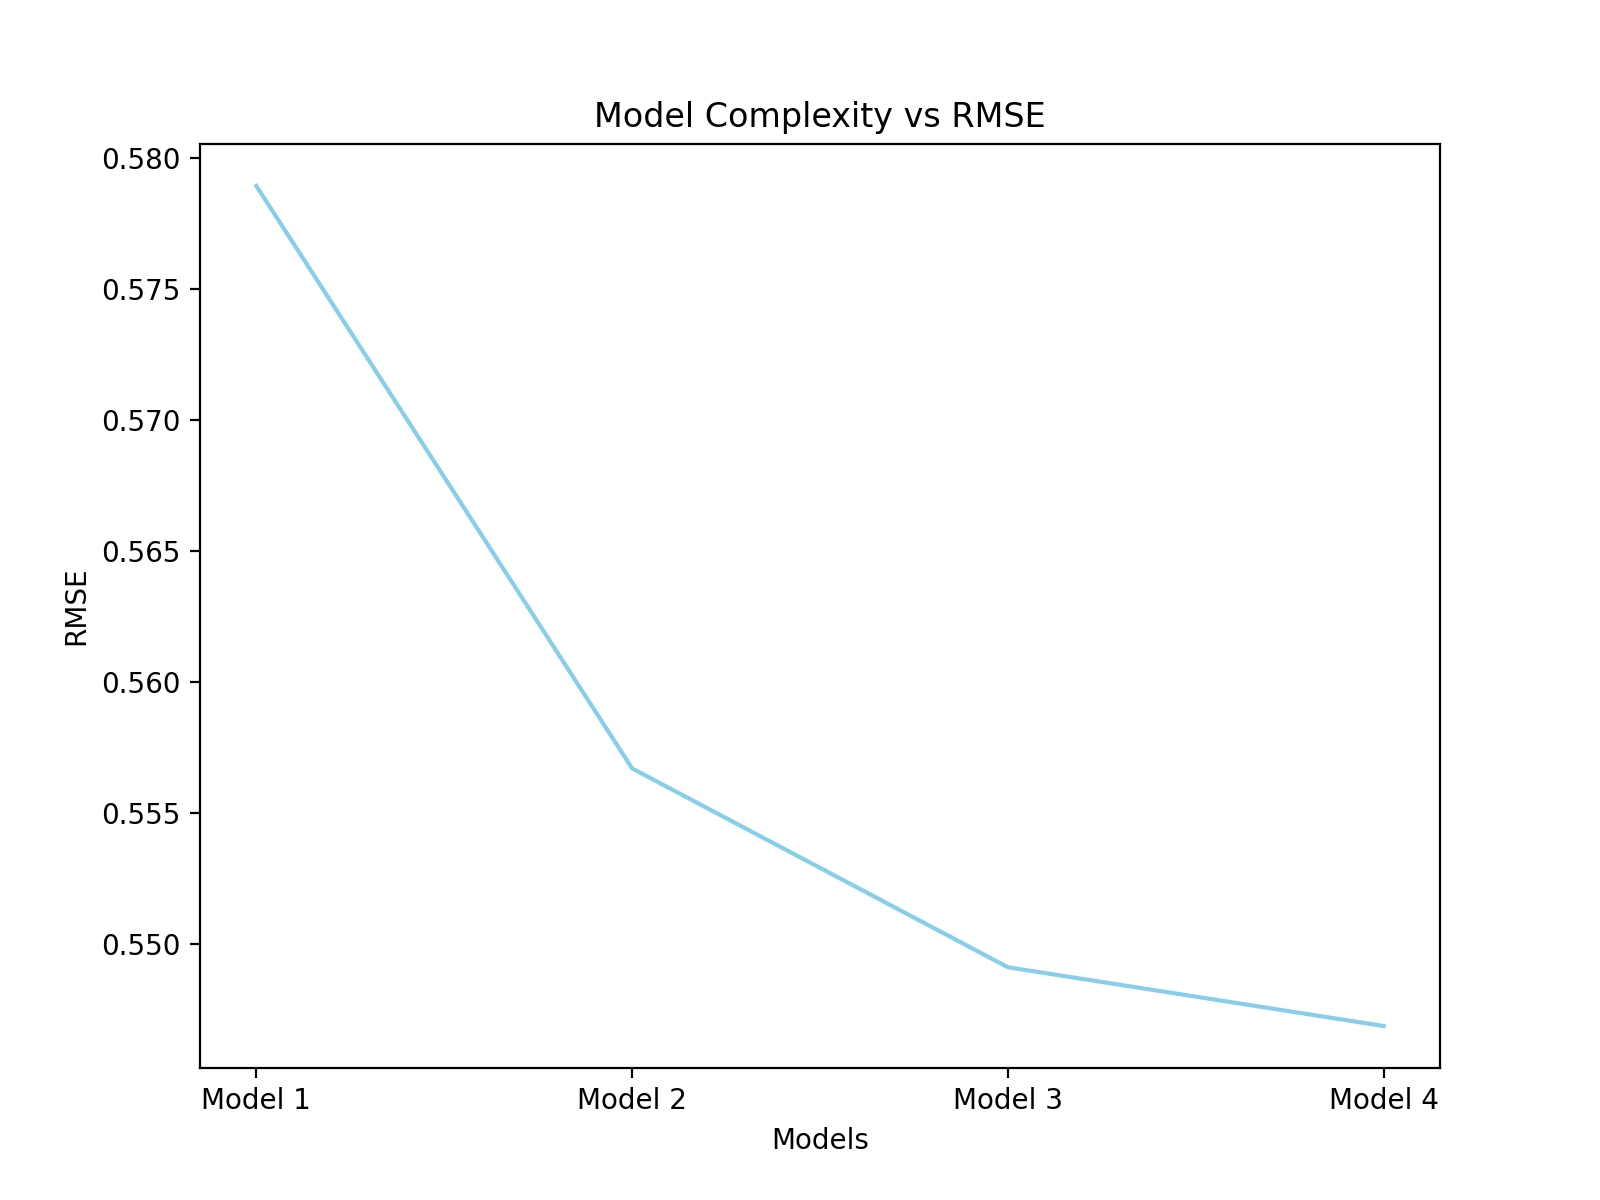

In [65]:
# Plott cross-validated RMSEs
plt.figure(figsize=(8, 6))
plt.plot(['Model 1','Model 2','Model 3','Model 4'], [0.578920, 0.556691, 0.549100, 0.546858] , color='skyblue') # used average RMSEs of CV
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Complexity vs RMSE')
plt.show()

Results are not very different from the full-sample RMSE. Although Model4 gives lowest RMSE, since the difference is too small, we can select Model3 as best performing model.

Although full-sample and cross-validated RMSEs are signalling more complex models, we should check prediction intervals to see which one gives narrower intervals.

In [80]:
new = pd.DataFrame(pd.Series({
    "stfips":'WY',
    "grade92":43,
    "age":30,
    "sex":2,
    "marital":1,
    "ownchild":3,
    "class_of_workers":'Private, Nonprofit',
    "unionmme":'No',
    "lfsr94":'Employed-At Work',
    "earnings_per_hour":np.nan,
    "ln_earnings_per_hour":np.nan,
    "agesq":30**2,
    "agecu":30**3,
    
})).T

In [82]:
# Specify the desired data types for each column
desired_types = {
    'stfips': str,     # Change to str
    'grade92': int,   # Change to int
    'age': int,
    'sex': int,
    'marital': int,
    'ownchild': int,
    "class_of_workers": str,
    "unionmme": str,
    "lfsr94": str,
    "agesq": int,
    "agecu": int
    
}

# Convert each column to the desired data type
new = new.astype(desired_types)
new

,stfips,grade92,age,sex,marital,ownchild,class_of_workers,unionmme,lfsr94,earnings_per_hour,ln_earnings_per_hour,agesq,agecu
0,WY,43,30,2,1,3,"Private, Nonprofit",No,Employed-At Work,NaN,NaN,900,27000


In [84]:
p1=model1.get_prediction(new).summary_frame()
p2=model2.get_prediction(new).summary_frame()
p3=model3.get_prediction(new).summary_frame()
p4=model4.get_prediction(new).summary_frame()

In [85]:
pd.DataFrame(
    {
        " ": ["Predicted", "PI_low(95%)", "PI_high(95%)"],
        "Model1": p1[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model2": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model3": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model4": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
    }
).set_index(" ")

,Model1,Model2,Model3,Model4
,,,,
Predicted,3.318954,3.224374,3.224374,3.224374
PI_low(95%),2.183378,2.134112,2.134112,2.134112
PI_high(95%),4.454530,4.314636,4.314636,4.314636


The simplest model (Model 1) has the highest 95 % prediction interval. THe other three models has same and slightly narrower prediction intervals.

### Conclusion

We started our analyis with an earnings data which has many qualitative variables and a few quantitative variables. We applied EDA and Feature Engineering and used our domain knowledge to prepate estimation model. In modelling part, we started with a simpler model and compared with more complex regression models. It turned out that, increasing explanatory variables included in the model improves the model performance but this is not unlimited. There is an optimal complexity level for regression models. A one step further of this analysis would be to compare RMSEs from test/live data.